Lab 3: Different Types of Data

Part 1: Nominal Data — Using Iris Dataset (species, no order categories)

<ipython-input-14-7dfde30779ae>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


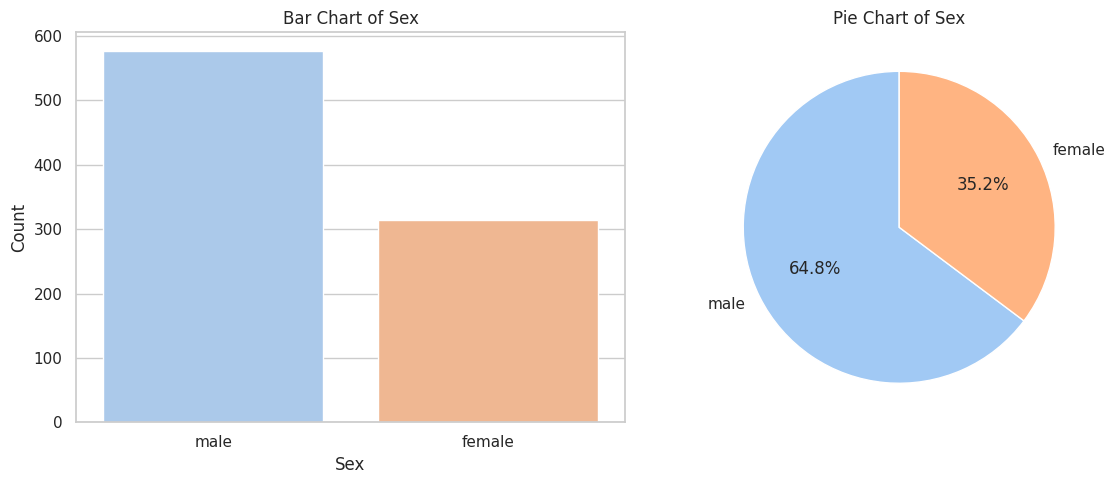

<ipython-input-14-7dfde30779ae>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


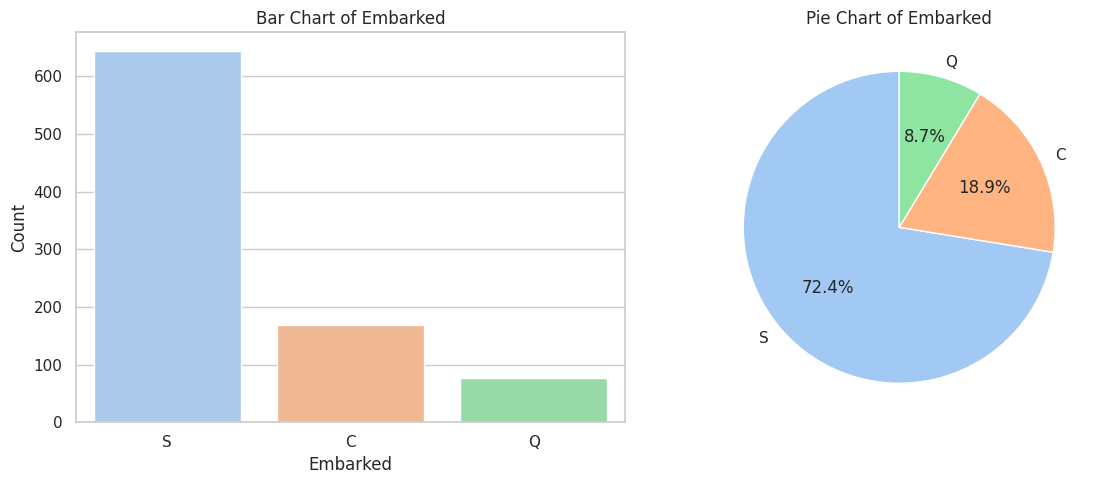

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset and striping column names of whitespace
df = pd.read_csv("Titanics.csv")
df.columns = df.columns.str.strip()

# Selecting the nominal columns
nominal_cols = ['Sex', 'Embarked']

# Creating the visualizations
for col in nominal_cols:
    plt.figure(figsize=(12, 5))

    # Bar chart
    plt.subplot(1, 2, 1)
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Pie chart
    plt.subplot(1, 2, 2)
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')  # Hide y-axis label

    plt.tight_layout()
    plt.show()

1. Ordinal Data Visualization
Dataset: Students Performance in Exams(This data set consists of the marks secured by the students in various subjects.)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For display settings
%matplotlib inline
sns.set(style='whitegrid')

# Optional: Set figure size globally
plt.rcParams['figure.figsize'] = (10, 6)

<ipython-input-16-34a06572ff5e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_ordinal, x='parental level of education', palette='Blues_d',


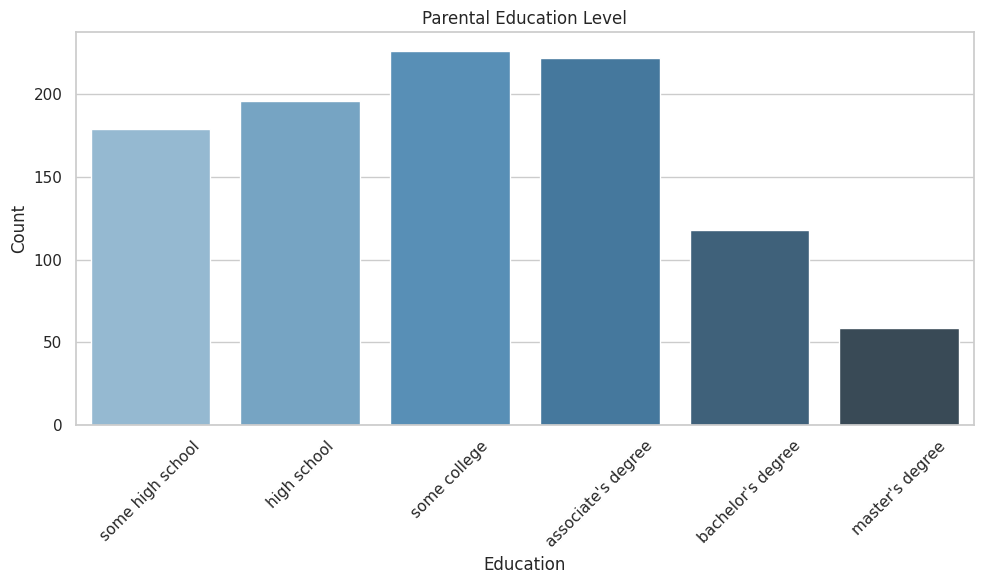

<ipython-input-16-34a06572ff5e>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_ordinal, x='test preparation course', y='math score', palette='Set1', jitter=True)


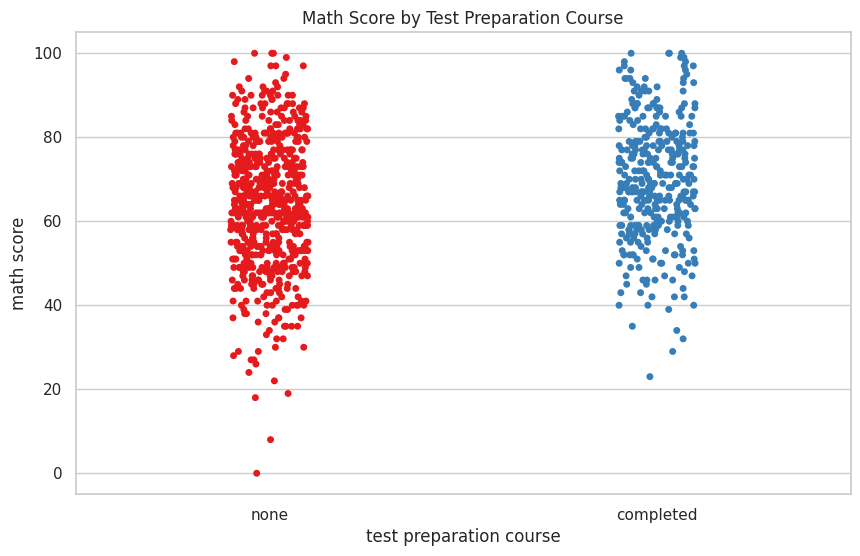

In [16]:
df_ordinal = pd.read_csv("StudentsPerformance.csv")

# Defining order
education_order = [
    "some high school", "high school", "some college",
    "associate's degree", "bachelor's degree", "master's degree"
]

# Converting to ordered category
df_ordinal['parental level of education'] = pd.Categorical(
    df_ordinal['parental level of education'], categories=education_order, ordered=True
)

# Ordered Bar Chart
sns.countplot(data=df_ordinal, x='parental level of education', palette='Blues_d',
              order=education_order)
plt.title("Parental Education Level")
plt.xlabel("Education")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Strip Plot by test preparation course
sns.stripplot(data=df_ordinal, x='test preparation course', y='math score', palette='Set1', jitter=True)
plt.title("Math Score by Test Preparation Course")
plt.show()

3. Interval Data
(Weather Dataset)

<ipython-input-20-ab861714e671>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Formatted Date'] = pd.to_datetime(data_subset['Formatted Date'], errors='coerce', utc=True)


datetime64[ns, UTC]


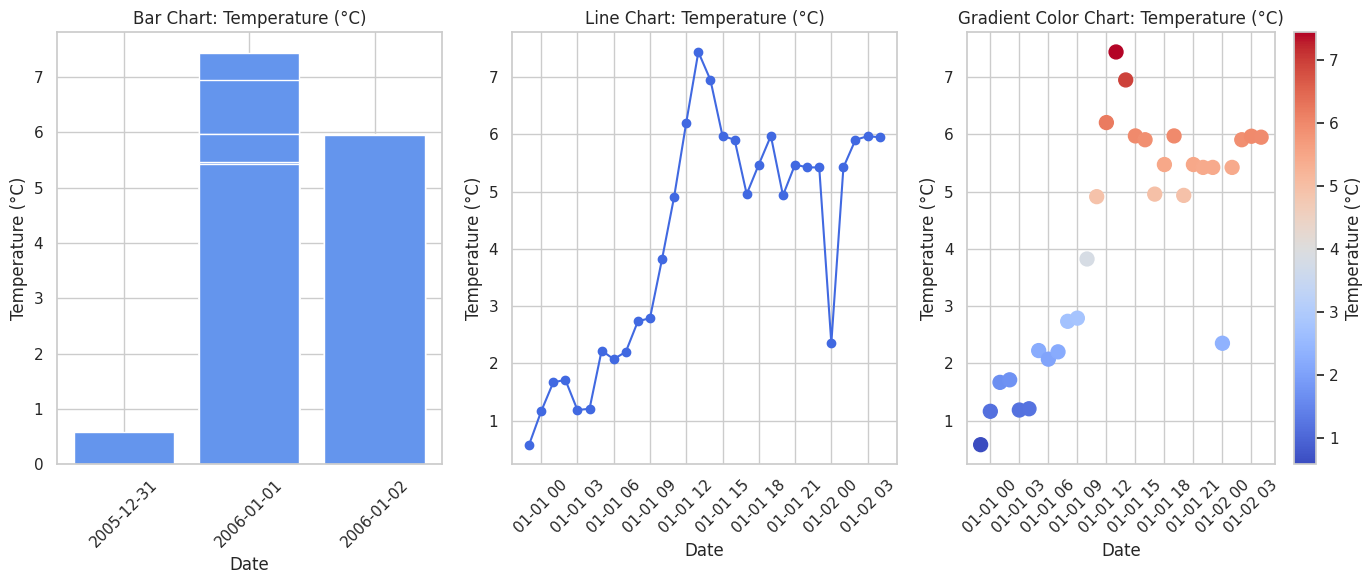

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV
df = pd.read_csv('weatherHistory.csv')

# Convert to datetime with UTC
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], errors='coerce', utc=True)
df = df.dropna(subset=['Formatted Date'])

# Sort the data by date
df_sorted = df.sort_values('Formatted Date')

# Take the first 30 records
data_subset = df_sorted.head(30)

# Re-convert with UTC to ensure correct datetime dtype
data_subset['Formatted Date'] = pd.to_datetime(data_subset['Formatted Date'], errors='coerce', utc=True)
data_subset = data_subset.dropna(subset=['Formatted Date'])

# Extract dates and temperatures
dates = data_subset['Formatted Date']
temps = data_subset['Temperature (C)']

print(dates.dtype)  # Should show datetime64[ns, UTC]

plt.figure(figsize=(14, 6))

# Bar Chart
plt.subplot(1, 3, 1)
plt.bar(dates.dt.strftime('%Y-%m-%d'), temps, color='cornflowerblue')
plt.xticks(rotation=45)
plt.title('Bar Chart: Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Line Chart
plt.subplot(1, 3, 2)
plt.plot(dates, temps, marker='o', color='royalblue')
plt.xticks(rotation=45)
plt.title('Line Chart: Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# Gradient Color Chart
plt.subplot(1, 3, 3)
sc = plt.scatter(dates, temps, c=temps, cmap='coolwarm', s=100)
plt.colorbar(sc, label='Temperature (°C)')
plt.xticks(rotation=45)
plt.title('Gradient Color Chart: Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)

plt.tight_layout()
plt.show()


Ratio

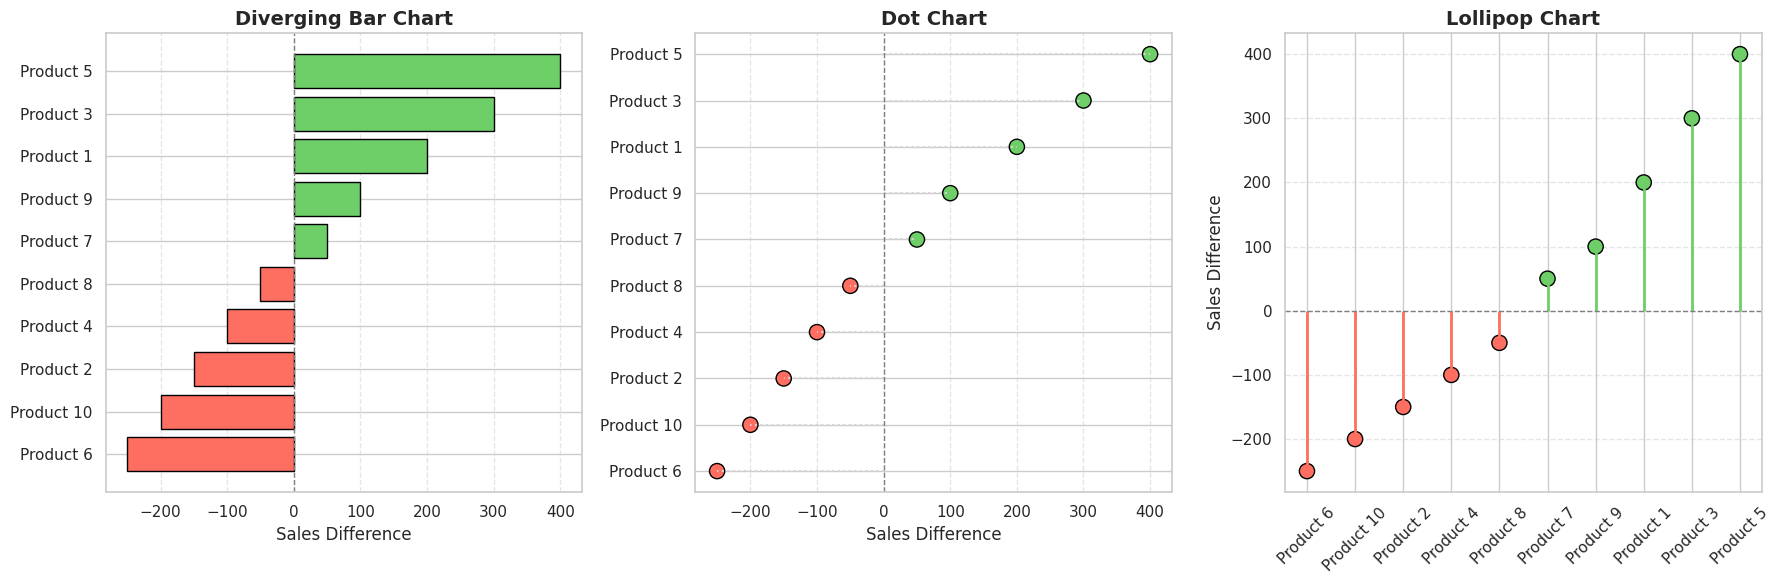

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample of quantitative data: Sales difference from target for 10 products
data = {
    'Product': [f'Product {i}' for i in range(1, 11)],
    'SalesDiff': [200, -150, 300, -100, 400, -250, 50, -50, 100, -200]
}
df = pd.DataFrame(data)

# Sort data by SalesDiff
df = df.sort_values('SalesDiff')

# Define colors: red for negative, green for positive
colors = ['#ff6f61' if x < 0 else '#6ecf68' for x in df['SalesDiff']]

# Create plots
plt.figure(figsize=(18, 6))

# Diverging Bar Chart
plt.subplot(1, 3, 1)
plt.barh(df['Product'], df['SalesDiff'], color=colors, edgecolor='black')
plt.axvline(0, color='gray', linewidth=1.0, linestyle='--')
plt.title('Diverging Bar Chart', fontsize=14, fontweight='bold')
plt.xlabel('Sales Difference')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Dot Chart
plt.subplot(1, 3, 2)
plt.hlines(df['Product'], xmin=0, xmax=df['SalesDiff'], color='lightgray', linestyles='dotted')
plt.scatter(df['SalesDiff'], df['Product'], color=colors, s=120, edgecolors='black')
plt.axvline(0, color='gray', linewidth=1.0, linestyle='--')
plt.title('Dot Chart', fontsize=14, fontweight='bold')
plt.xlabel('Sales Difference')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Lollipop Chart (Bonus)
plt.subplot(1, 3, 3)
plt.vlines(x=df['Product'], ymin=0, ymax=df['SalesDiff'], color=colors, linewidth=2)
plt.scatter(df['Product'], df['SalesDiff'], color=colors, s=120, edgecolors='black')
plt.axhline(0, color='gray', linewidth=1.0, linestyle='--')
plt.title('Lollipop Chart', fontsize=14, fontweight='bold')
plt.ylabel('Sales Difference')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Layout
plt.tight_layout()
plt.show()
